In [1]:
import numpy as np
import matplotlib.pyplot as plt


NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


class Bandit:
    def __init__(self, p):
        # p: the win rate
        self.p = p
        self.p_estimate = 0.
        self.N = 0. # num samples collected so far

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N
        

In [2]:
def ucb(mean, n, nj):
    
    return mean + np.sqrt(2*np.log(n) / nj)


def run_experiment():
    
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    rewards = np.empty(NUM_TRIALS)
    
    payments = [[],[],[]]
    
    total_plays = 0

  # initialization: play each bandit once
    for j in range(len(bandits)):
        
        x = bandits[j].pull()
        
        total_plays += 1
        
        bandits[j].update(x)
        
        num_explore = 0
  
    for i in range(NUM_TRIALS):
        
        j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
        
        if j != np.argmax(BANDIT_PROBABILITIES):
            num_explore += 1
        
        x = bandits[j].pull()
        
        total_plays += 1
        
        bandits[j].update(x)

        # for the plot
        rewards[i] = x
        
        payments[j].append(x)

    for idx, b in enumerate(bandits):
        
        print('The slot machine', idx+1, b.p_estimate)
        
        cumulative_average = np.cumsum(payments[idx]) / (np.arange(len(payments[idx])) + 1)
        
        plt.figure(figsize=(8,6))
        plt.plot(cumulative_average)
        
        plt.plot(np.ones(len(payments[idx]))*BANDIT_PROBABILITIES[idx])
        plt.title('Number of plays to converge to true mean slot machine'+ str(idx + 1))
        plt.show()

    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print('number of time explore', num_explore)
    print("num times selected each bandit:", [b.N for b in bandits])

    return cumulative_average



The slot machine 1 0.22500000000000003


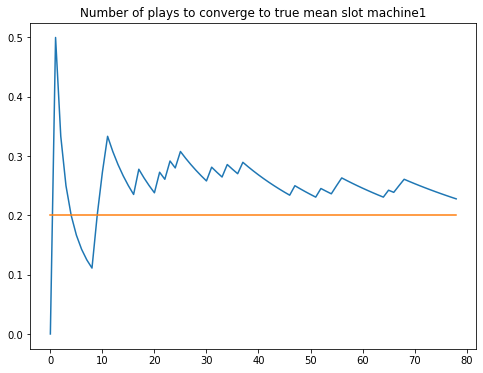

The slot machine 2 0.49691358024691357


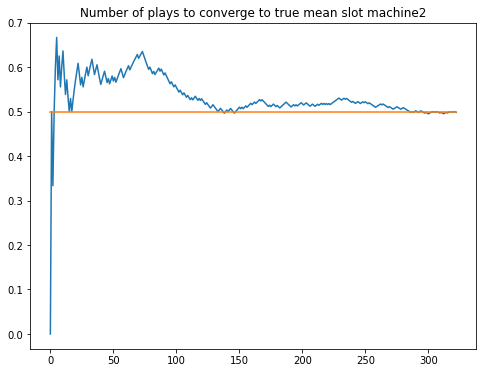

The slot machine 3 0.7486520949005442


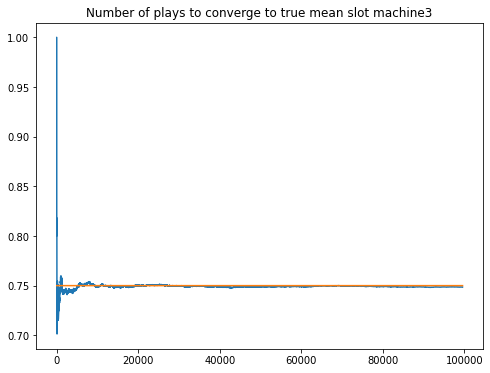

total reward earned: 74743.0
overall win rate: 0.74743
number of time explore 402
num times selected each bandit: [80.0, 324.0, 99599.0]


In [3]:
if __name__ == "__main__":
    run_experiment()